#  <center> Decoding Human Emotions from Speech Signals <center>


### Project Overview

This project focuses on Speech Emotion Recognition (SER)—the process of identifying and classifying human emotions from audio signals. By leveraging deep learning, we strive to extract emotional features from speech, enhancing our ability to understand and react to human interactions in a more natural, intuitive manner.

---

### What is Speech Emotion Recognition (SER)?

**Speech Emotion Recognition (SER)** is the technique of identifying the emotional state of a speaker from their voice. Unlike traditional speech recognition, which focuses on transcribing words, SER analyzes tone, pitch, cadence, and other vocal characteristics to detect underlying feelings. This process is akin to how animals, such as dogs and horses, instinctively sense human emotions through vocal cues.

---

### Why Build an SER Classifier?

There are several compelling reasons to develop a speech emotion detection system:

1. **Enhanced Customer Service:**  
   SER can be integrated into call center operations to evaluate customer satisfaction. By analyzing voice data, companies can identify dissatisfied customers and take proactive steps to improve service quality.

2. **Automotive Safety:**  
   In-vehicle systems can monitor a driver’s emotional state. Detecting signs of fatigue or distress early can trigger safety mechanisms to prevent accidents.

3. **Improved Human-Computer Interaction:**  
   Emotion-aware systems can respond more naturally and empathetically, creating more intuitive user experiences in applications ranging from virtual assistants to interactive entertainment.

4. **Mental Health Insights:**  
   Analyzing speech for emotional cues provides a non-invasive way to monitor mental well-being, supporting early intervention and ongoing care in clinical settings.

---

### Datasets Utilized

To capture the rich diversity of emotional expression, this project employs several high-quality, publicly available datasets:

- **CREMA-D (Crowd-sourced Emotional Multimodal Actors Dataset):**  
  A diverse collection of emotional expressions recorded from actors, offering a wide range of emotional variability.

- **RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song):**  
  A dataset that combines speech and song, providing nuanced vocal expressions across multiple emotions.

- **SAVEE (Surrey Audio-Visual Expressed Emotion):**  
  This dataset focuses on a set of clearly defined emotional expressions, ideal for developing a baseline model.

- **TESS (Toronto Emotional Speech Set):**  
  Comprising a broad spectrum of speech samples annotated with detailed emotional labels, this dataset enhances model robustness.

---

### Conclusion

This notebook sets the stage for a comprehensive exploration of Speech Emotion Recognition. By integrating deep learning with diverse audio datasets, we not only advance the field of emotion recognition but also open doors to innovative applications in customer service, automotive safety, and beyond.


## Install and Import Libraries

In [1]:
# If needed, install the required packages (run once)
!pip install numpy pandas librosa matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 32.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

2025-04-07 12:25:25.716236: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 12:25:25.716289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 12:25:25.716321: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 12:25:25.724835: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preparation
* As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
* We will use this dataframe to extract features for our model training.

In [3]:

DATA_PATH = "/workspace/Naveen/emotion_detection/"  # Root folder containing the datasets
Ravdess = os.path.join(DATA_PATH, "RAVDESS/")
Tess = os.path.join(DATA_PATH, "TESS/")
Savee = os.path.join(DATA_PATH, "SAVEE/")
Crema = os.path.join(DATA_PATH, "CREMAD/")

# For RAVDESS, the emotion codes are usually:
# 1: neutral, 2: calm, 3: happy, 4: sad, 5: angry, 6: fearful, 7: disgust, 8: surprised
# For TESS, file names typically include the emotion name.
# We include all these emotions in our mapping.
EMOTIONS = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# MFCC extraction parameters
N_MFCC = 40      # Number of MFCC coefficients/features
MAX_LENGTH = 130 # Fixed number of time steps (adjust based on your dataset)


### Dataset Loading Functions

##  <center> 1. Ravdess Dataframe <center>
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4
This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0       sad  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
1  surprise  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
2     happy  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
3  surprise  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
4      fear  /workspace/Naveen/emotion_detection/RAVDESS/Ac...

## <center>2. Crema DataFrame</center>

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0  neutral  /workspace/Naveen/emotion_detection/CREMAD/103...
1    happy  /workspace/Naveen/emotion_detection/CREMAD/102...
2  disgust  /workspace/Naveen/emotion_detection/CREMAD/103...
3  disgust  /workspace/Naveen/emotion_detection/CREMAD/103...
4    angry  /workspace/Naveen/emotion_detection/CREMAD/103...

##  <center> 3. TESS dataset <center>

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for directory in tess_directory_list:
    dir_path = os.path.join(Tess, directory)
    # Ensure we are dealing with a directory
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            # Remove file extension and split on '_'
            parts = file.split('.')[0].split('_')
            # If there are enough parts, try to get the emotion part from index 2
            if len(parts) > 2:
                part = parts[2]
            else:
                # Fallback: use the last part if index 2 doesn't exist
                part = parts[-1]
            # Map the 'ps' variant to 'surprise'
            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)
            file_path.append(os.path.join(dir_path, file))

# Create dataframes for emotions and paths, then combine them.
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0      sad  /workspace/Naveen/emotion_detection/TESS/OAF_S...
1      sad  /workspace/Naveen/emotion_detection/TESS/OAF_S...
2      sad  /workspace/Naveen/emotion_detection/TESS/OAF_S...
3      sad  /workspace/Naveen/emotion_detection/TESS/OAF_S...
4      sad  /workspace/Naveen/emotion_detection/TESS/OAF_S...

##  <center> 4. CREMA-D dataset <center>
The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0     fear  /workspace/Naveen/emotion_detection/SAVEE/KL_f...
1  neutral  /workspace/Naveen/emotion_detection/SAVEE/JK_n...
2  neutral  /workspace/Naveen/emotion_detection/SAVEE/DC_n...
3     fear  /workspace/Naveen/emotion_detection/SAVEE/JK_f...
4    angry  /workspace/Naveen/emotion_detection/SAVEE/DC_a...

In [8]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0       sad  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
1  surprise  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
2     happy  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
3  surprise  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
4      fear  /workspace/Naveen/emotion_detection/RAVDESS/Ac...

## Data Exploration and Visualisation

In [9]:
data_path.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12162 entries, 0 to 479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  12162 non-null  object
 1   Path      12162 non-null  object
dtypes: object(2)
memory usage: 285.0+ KB


In [10]:
data_path.describe()

Emotions                                               Path
count     12162                                              12162
unique        8                                              12162
top         sad  /workspace/Naveen/emotion_detection/RAVDESS/Ac...
freq       1923                                                  1

In [11]:
data_path.isnull().sum()

Emotions    0
Path        0
dtype: int64

Let's plot the count of each emotions in our dataset.

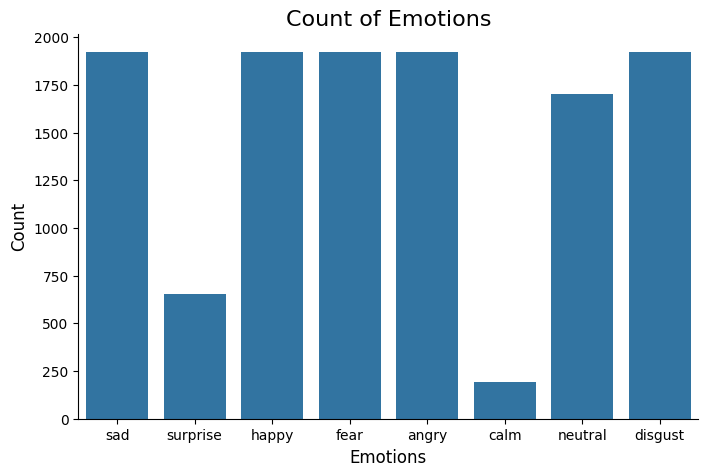

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=data_path, x='Emotions')
plt.title('Count of Emotions', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


### Emotion Class Distribution After Preprocessing

In our dataset, the number of samples labeled as **'calm'** is significantly lower compared to other emotion classes. To balance the dataset and avoid skewed learning, we have **merged 'calm' into 'neutral'**, as both represent non-expressive or low-arousal emotional states.

Additionally, the class **'surprise'** has a relatively low number of samples. Retaining such an underrepresented class can lead to **overfitting**, where the model memorizes the few examples instead of generalizing well. Hence, we **removed 'surprise'** from the dataset to improve model performance and stability.

---

### Updated Emotion Distribution Plot


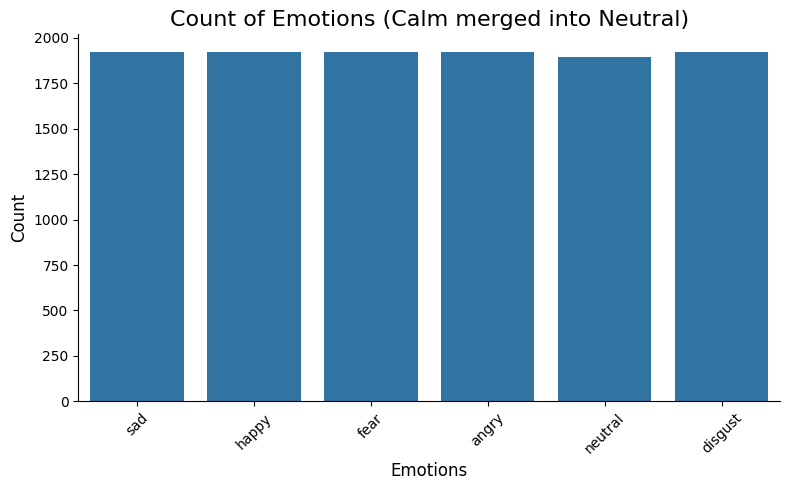

In [13]:
# Plot the updated count distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Merge 'calm' into 'neutral'
data_path['Emotions'] = data_path['Emotions'].replace({'calm': 'neutral'})

data_path = data_path[data_path['Emotions'] != 'surprise']

plt.figure(figsize=(8, 5))
sns.countplot(data=data_path, x='Emotions')
plt.title('Count of Emotions (Calm merged into Neutral)', fontsize=16)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


emotions = ['sad','happy', 'fear', 'angry', 'disgust', 'neutral'] 

# Create and fit new label encoder
label_encoder = LabelEncoder()
label_encoder.fit(emotions)

# Save it again
np.save('label_encoder.npy', label_encoder)


We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.
* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [14]:
import matplotlib.pyplot as plt
import librosa.display

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

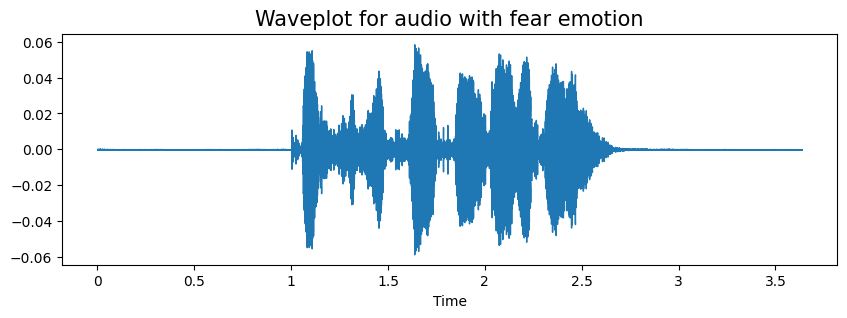

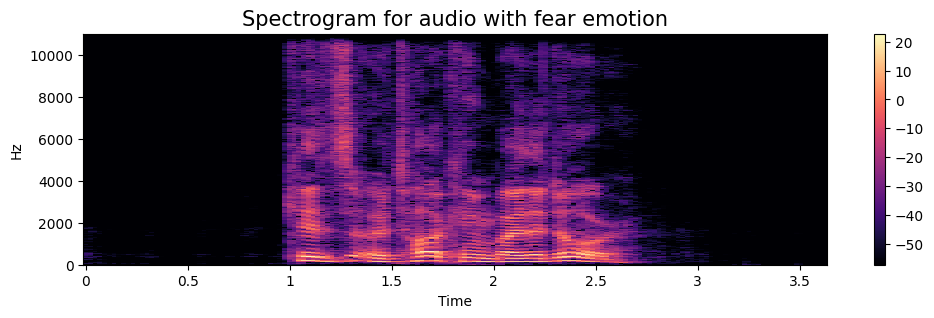

In [15]:
from IPython.display import Audio

emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

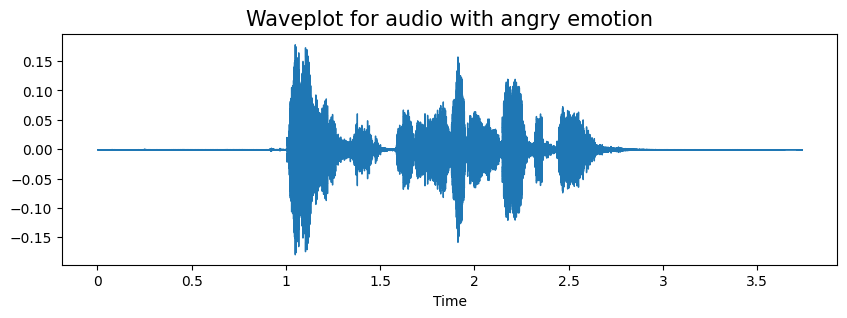

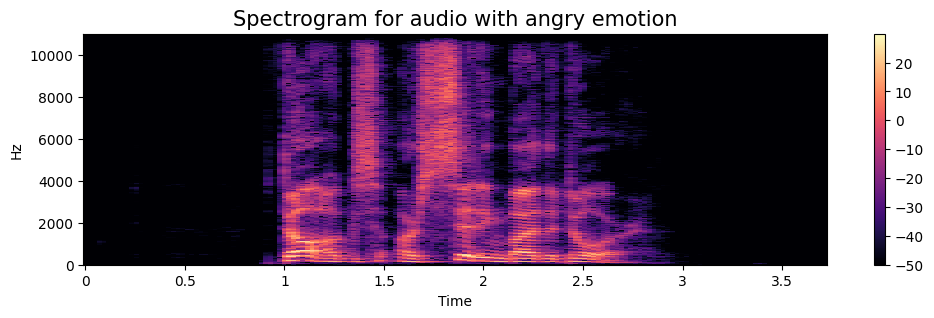

In [16]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

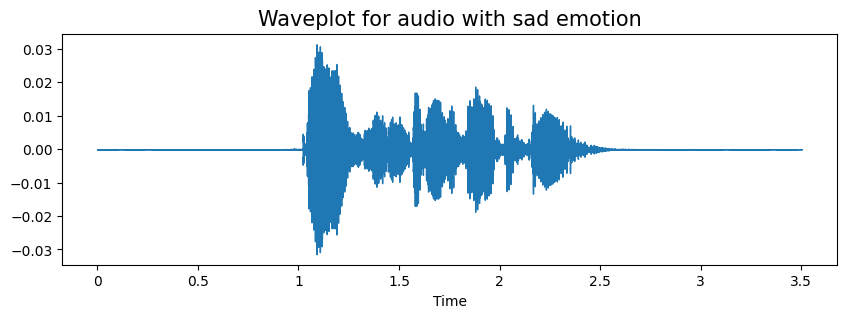

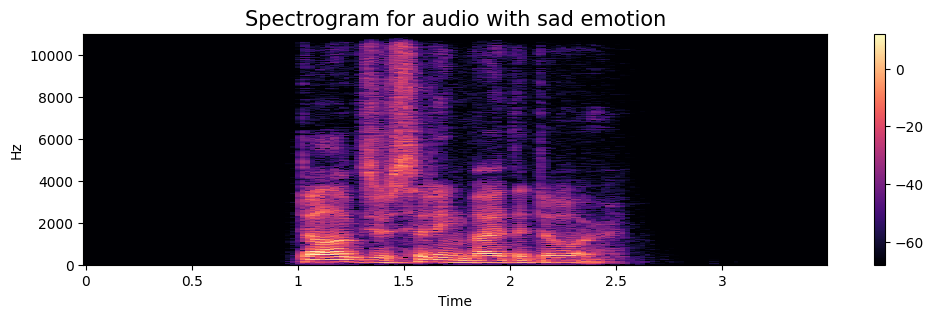

In [17]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

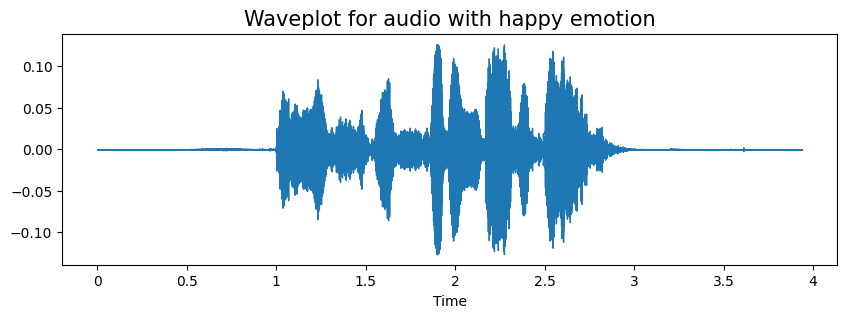

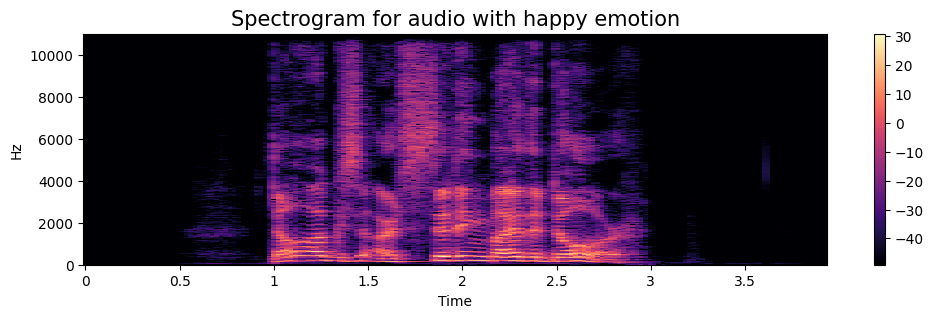

In [18]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [19]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)  # Fixed: added y= and rate=

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

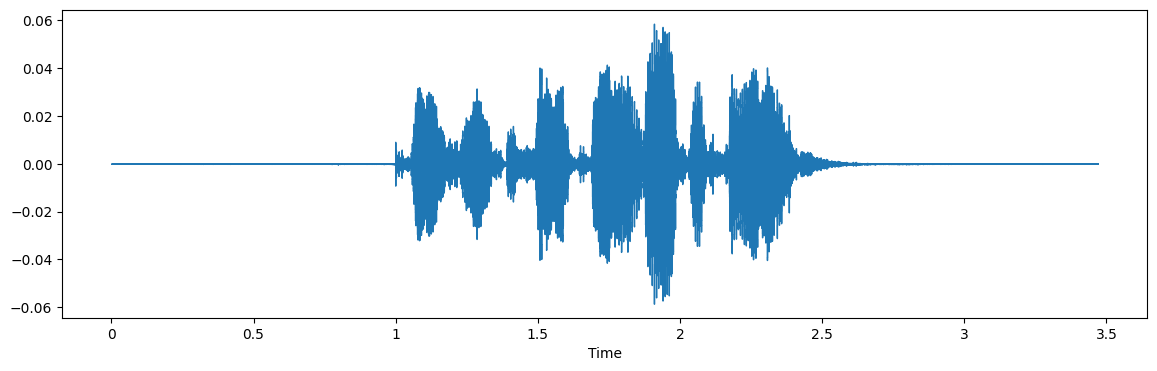

In [20]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection

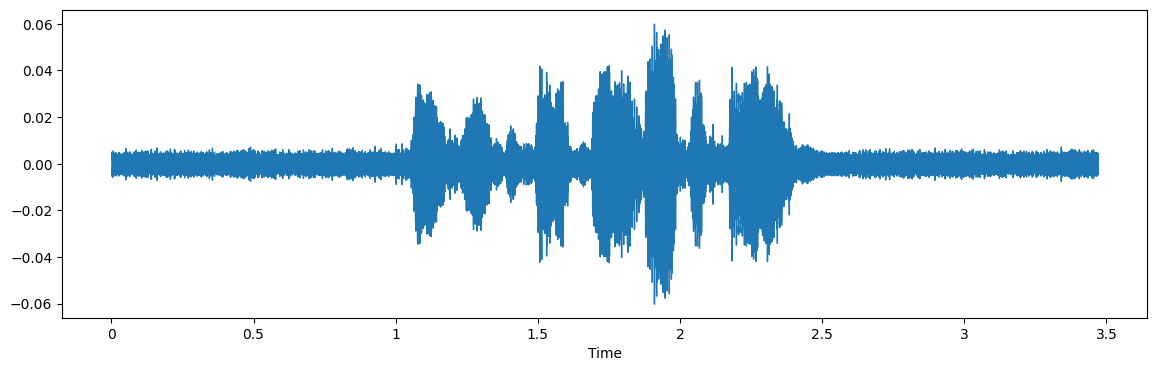

In [21]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 3. Stretching

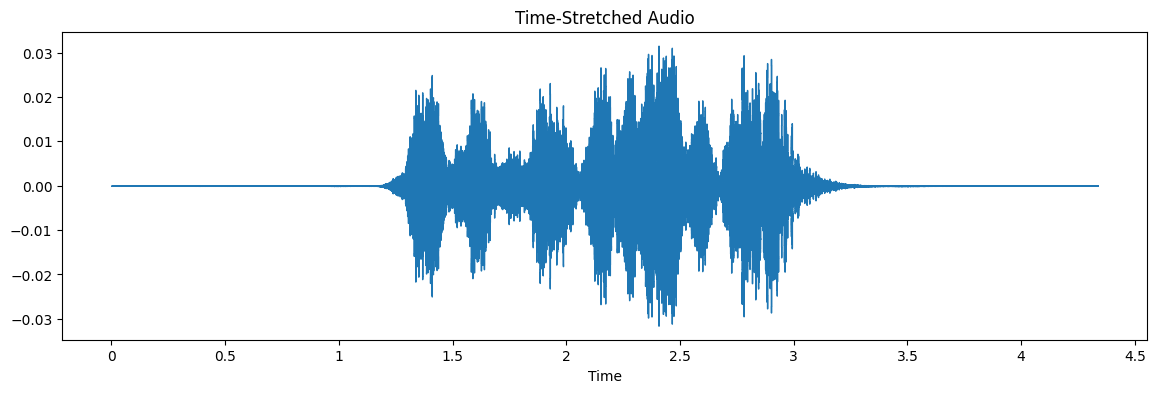

In [22]:
# Assume data and sample_rate are already loaded
if data.ndim > 1:
    data = librosa.to_mono(data)

# Apply time stretching
y_stretched = librosa.effects.time_stretch(data, rate=0.8)

# Plot
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=y_stretched, sr=sample_rate)
plt.title("Time-Stretched Audio")
plt.show()


#### 4. Shifting

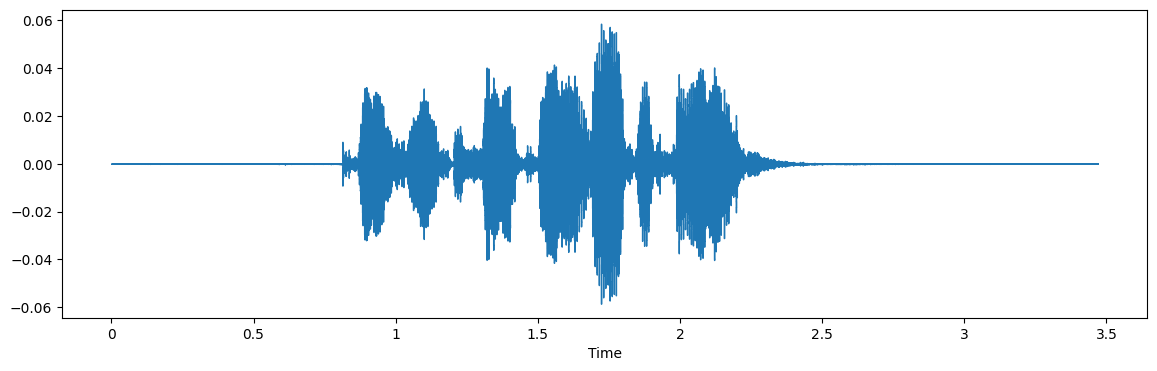

In [23]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 5. Pitch

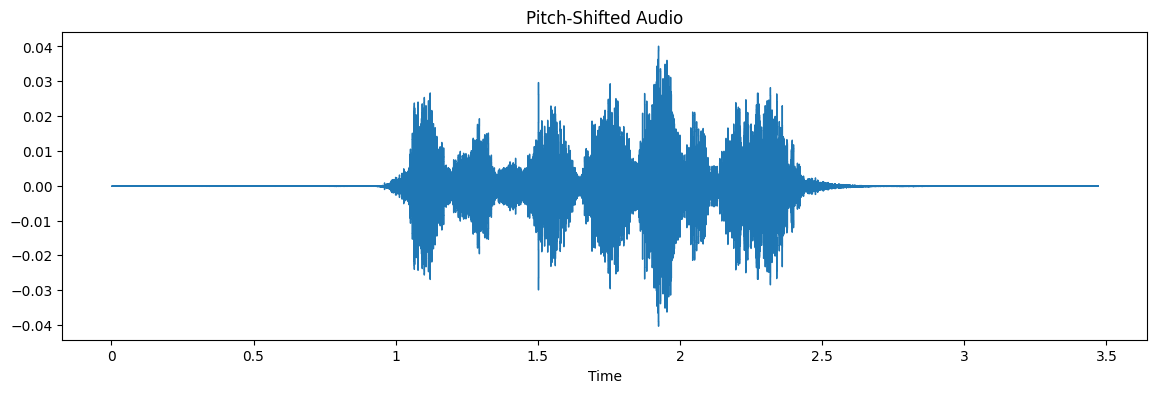

In [24]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Pitch-Shifted Audio")
plt.show()


- From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.

## Feature Extraction

Feature extraction is a critical step in audio analysis, enabling us to convert raw audio signals into a format that machine learning models can understand. Raw audio data consists of three key dimensions: **time**, **amplitude**, and **frequency**. By extracting specific features, we can uncover meaningful patterns and relationships that are otherwise hidden in the raw data.

### Understanding Audio Signals

An audio signal is inherently three-dimensional:
- **Time:** Captures the evolution of the signal.
- **Amplitude:** Represents the loudness or strength of the signal.
- **Frequency:** Indicates the pitch or tonal quality of the sound.

![Audio Signal Representation](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

### Inspiration and Resources

For a deeper understanding of audio feature extraction, I highly recommend reading an insightful blog post by [Askash Mallik](https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225). The blog explains how, by utilizing the sample rate and sample data, one can perform various transformations to extract valuable features from audio signals.

### Key Audio Features

Based on standard practices and the insights from the blog, the following features are commonly extracted from audio signals:

1. **Zero Crossing Rate:**  
   Measures the rate at which the signal changes sign, indicating the signal's frequency content.
   
2. **Energy:**  
   Computes the sum of squared signal values normalized by the frame length, reflecting the overall loudness.
   
3. **Entropy of Energy:**  
   Quantifies the randomness of sub-frame energies, serving as an indicator of abrupt changes in the signal.
   
4. **Spectral Centroid:**  
   Represents the center of gravity of the spectrum, which correlates with the perceived brightness of the sound.
   
5. **Spectral Spread:**  
   The second central moment of the spectrum, providing insights into the distribution of spectral energy.
   
6. **Spectral Entropy:**  
   Calculates the entropy of normalized spectral energies across sub-frames, measuring the complexity of the spectrum.
   
7. **Spectral Flux:**  
   The squared difference between successive spectral magnitudes, capturing how the spectrum evolves over time.
   
8. **Spectral Rolloff:**  
   The frequency below which a significant percentage (commonly 90%) of the total spectral energy is contained.
   
9. **MFCCs (Mel Frequency Cepstral Coefficients):**  
   Provides a cepstral representation of the audio signal with frequencies distributed according to the mel-scale.
   
10. **Chroma Vector:**  
    A 12-dimensional representation capturing the energy distribution across the 12 pitch classes (semitones) in Western music.
    
11. **Chroma Deviation:**  
    Measures the standard deviation of the chroma vector, reflecting variations in the pitch class energy.

### Selected Features for Our Project

For this project, we are focusing on extracting the following five features to train our model effectively:

- **Zero Crossing Rate**
- **Chroma_stft**
- **MFCC**
- **RMS (Root Mean Square) Energy**
- **MelSpectrogram**

These features are chosen to capture the essential characteristics of the audio signal, providing a balanced approach to both computational efficiency and representational richness.


In [25]:
def extract_features(data, sample_rate):
    """
    Extracts a set of features from an audio signal.
    Features extracted:
      - Zero Crossing Rate (ZCR)
      - Chroma STFT
      - MFCC
      - RMS (Root Mean Square)
      - Mel Spectrogram
    """
    # Initialize an empty array to store features
    result = np.array([])
    
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))
    
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))
    
    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))
    
    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    """
    Loads an audio file and extracts features with three techniques:
      1. Original audio
      2. Audio with added noise
      3. Audio with time-stretching and pitch shifting
    Returns a stacked array of features for each augmentation.
    """
    # Load audio with specified duration and offset
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array([res1])  # Ensure result is 2D (one row)
    
    # With noise augmentation (assuming noise() function is defined elsewhere)
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))
    
    # With stretching and pitching augmentation (assuming stretch() and pitch() functions are defined)
    new_data = stretch(data)  # stretch() returns time-stretched data
    data_stretch_pitch = pitch(new_data, sample_rate)  # pitch() applies pitch shifting
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))
    
    return result

In [26]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [27]:
len(X), len(Y), data_path.Path.shape

(34530, 34530, (11510,))

In [28]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.217461  0.693563  0.737094  0.725162  0.685810  0.643537  0.569880   
1  0.244647  0.738318  0.775892  0.771840  0.762114  0.727910  0.648069   
2  0.140495  0.634266  0.669098  0.704341  0.701906  0.661059  0.574876   
3  0.267546  0.688829  0.730021  0.708485  0.706601  0.734002  0.700951   
4  0.261416  0.739706  0.796292  0.778843  0.773648  0.803786  0.733175   

          7         8         9  ...       153       154       155       156  \
0  0.527837  0.596964  0.635166  ...  0.000018  0.000014  0.000014  0.000005   
1  0.568533  0.628862  0.672239  ...  0.000037  0.000033  0.000033  0.000023   
2  0.554285  0.519023  0.568971  ...  0.000002  0.000004  0.000004  0.000005   
3  0.615528  0.637450  0.679339  ...  0.000014  0.000009  0.000015  0.000010   
4  0.604375  0.625145  0.681681  ...  0.000040  0.000033  0.000040  0.000036   

        157       158       159       160           161  labels  
0  0.000007  0.000011  0.000022  0.000018  9.493052e-07     sad  
1  0.000025  0.000030  0.000042  0.000036  1.962266e-05     sad  
2  0.000002  0.000001  0.000002  0.000001  1.771166e-07     sad  
3  0.000013  0.000016  0.000012  0.000011  1.123394e-06   happy  
4  0.000037  0.000040  0.000037  0.000037  2.572496e-05   happy  

[5 rows x 163 columns]

* We have applied data augmentation and extracted the features for each audio files and saved them.

## Data Preparation

- As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [29]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [30]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [31]:
# splitting data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27624, 162), (27624, 6), (6906, 162), (6906, 6))

In [32]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27624, 162), (27624, 6), (6906, 162), (6906, 6))

In [33]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27624, 162, 1), (27624, 6), (6906, 162, 1), (6906, 6))

## Modelling

In [41]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, GlobalAveragePooling1D, LayerNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

def custom_lstm(*args, **kwargs):
    """Custom LSTM layer to handle compatibility issues when loading saved models"""
    if 'time_major' in kwargs:
        kwargs.pop('time_major')
    return tf.keras.layers.LSTM(*args, **kwargs)


# Define the model architecture
input_shape = (162, 1)
model = Sequential([
    # CNN Feature Extractor
    Conv1D(128, kernel_size=5, activation='relu', input_shape=input_shape),
    LayerNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu'),
    LayerNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Sequence Modeling with simple LSTM using the custom function
    custom_lstm(128, return_sequences=True),
    LayerNormalization(),
    Dropout(0.4),

    GlobalAveragePooling1D(),  # Reduces time dimension
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    Dense(6, activation='softmax')
])

optimizer = Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 158, 128)          768       
                                                                 
 layer_normalization_5 (Lay  (None, 158, 128)          256       
 erNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 79, 128)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 79, 128)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 77, 256)           98560     
                                                                 
 layer_normalization_6 (Lay  (None, 77, 256)          

In [42]:
# Define a ModelCheckpoint callback to save the best model based on training accuracy
checkpoint = ModelCheckpoint('best_model_new.h5', 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [43]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data = (x_test, y_test),
                    callbacks=[checkpoint],
                    verbose=1)


Epoch 1/50
864/864 [==============================] - ETA: 0s - loss: 1.7133 - accuracy: 0.3132
Epoch 1: val_accuracy improved from -inf to 0.37431, saving model to best_model_new.h5
864/864 [==============================] - 51s 47ms/step - loss: 1.7133 - accuracy: 0.3132 - val_loss: 1.6056 - val_accuracy: 0.3743
Epoch 2/50
864/864 [==============================] - ETA: 0s - loss: 1.5433 - accuracy: 0.4050
Epoch 2: val_accuracy improved from 0.37431 to 0.43440, saving model to best_model_new.h5
864/864 [==============================] - 31s 36ms/step - loss: 1.5433 - accuracy: 0.4050 - val_loss: 1.4673 - val_accuracy: 0.4344
Epoch 3/50
862/864 [============================>.] - ETA: 0s - loss: 1.4188 - accuracy: 0.4541
Epoch 3: val_accuracy improved from 0.43440 to 0.49334, saving model to best_model_new.h5
864/864 [==============================] - 32s 37ms/step - loss: 1.4187 - accuracy: 0.4541 - val_loss: 1.3322 - val_accuracy: 0.4933
Epoch 4/50
864/864 [==========================

864/864 [==============================] - 29s 34ms/step - loss: 0.9102 - accuracy: 0.6492 - val_loss: 1.0158 - val_accuracy: 0.6008
Epoch 28/50
863/864 [============================>.] - ETA: 0s - loss: 0.8974 - accuracy: 0.6535
Epoch 28: val_accuracy did not improve from 0.60889
864/864 [==============================] - 33s 39ms/step - loss: 0.8974 - accuracy: 0.6536 - val_loss: 1.0097 - val_accuracy: 0.6048
Epoch 29/50
864/864 [==============================] - ETA: 0s - loss: 0.8904 - accuracy: 0.6559
Epoch 29: val_accuracy improved from 0.60889 to 0.60933, saving model to best_model_new.h5
864/864 [==============================] - 31s 35ms/step - loss: 0.8904 - accuracy: 0.6559 - val_loss: 1.0166 - val_accuracy: 0.6093
Epoch 30/50
863/864 [============================>.] - ETA: 0s - loss: 0.8864 - accuracy: 0.6617
Epoch 30: val_accuracy improved from 0.60933 to 0.61309, saving model to best_model_new.h5
864/864 [==============================] - 29s 33ms/step - loss: 0.8864 - ac

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [42]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

216/216 [==============================] - 5s 22ms/step


In [43]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0            happy         angry
1          neutral       neutral
2            happy         happy
3              sad           sad
4              sad       neutral
5            angry         angry
6             fear           sad
7          disgust       disgust
8             fear       neutral
9          disgust       disgust

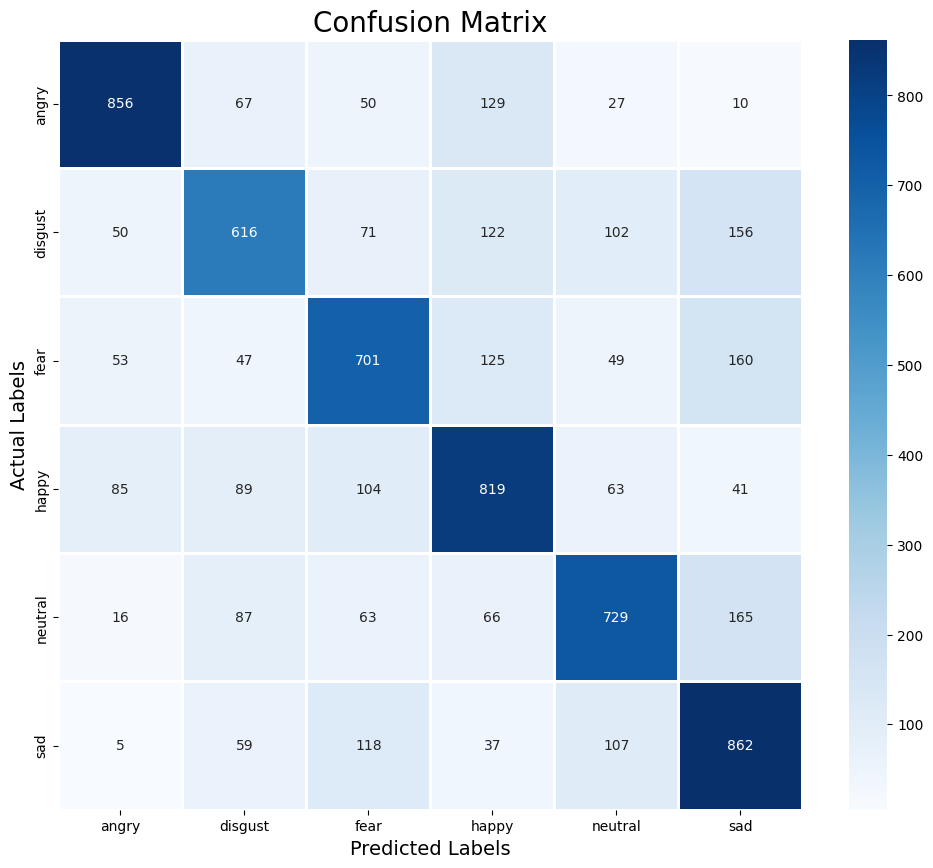

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()